/tmp/ipykernel_27138/732325311.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=ax_missing, palette="viridis")
/tmp/ipykernel_27138/732325311.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_missing.set_xticklabels(ax_missing.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_27138/732325311.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dtypes_series.index.astype(str), y=dtypes_series.values, ax=ax_types, palette="coolwarm")
/tmp/ipykernel_27138/732325311.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is depre

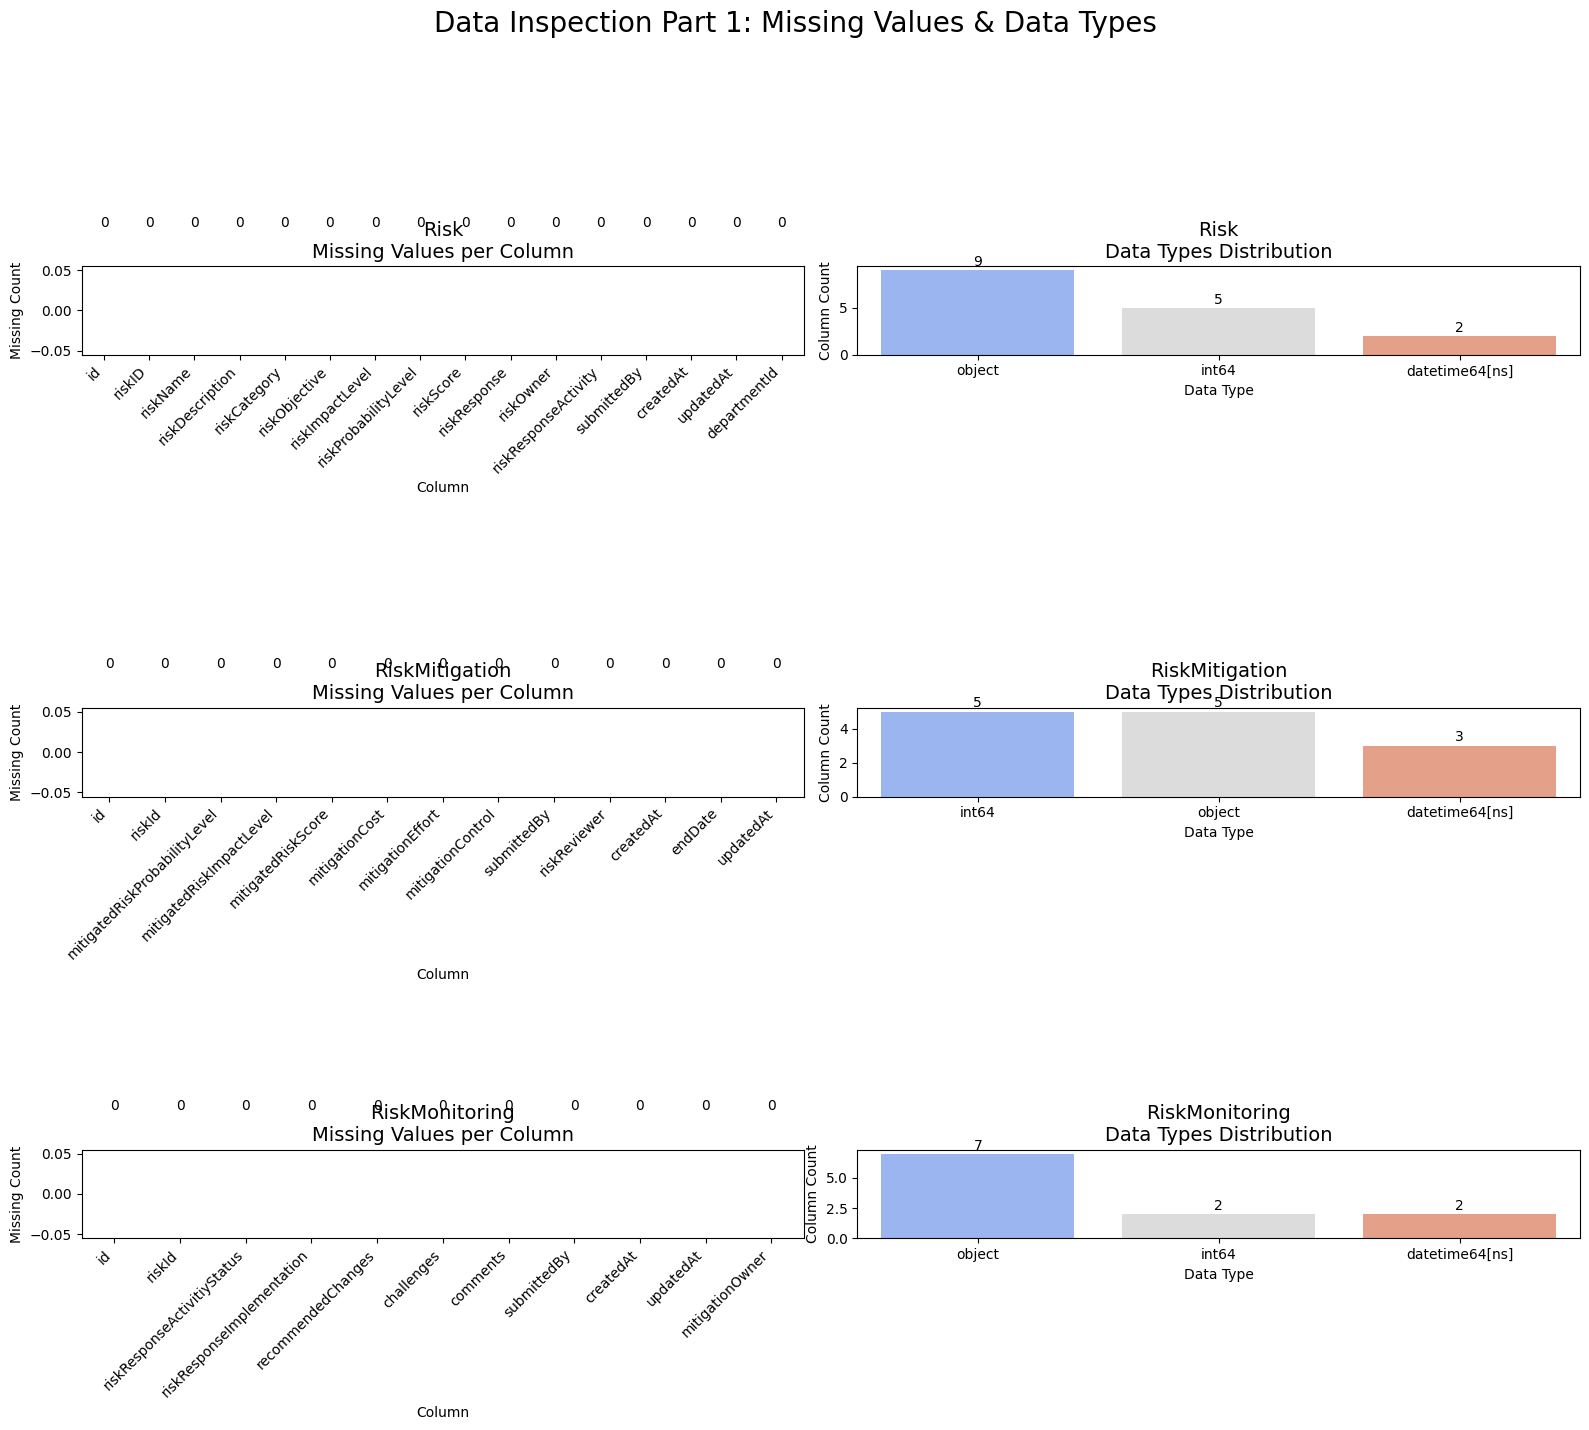

In [7]:
# inspect_1.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helpers import load_data_from_db

# Define the tables to inspect in this notebook
tables1 = {
    "Risk": load_data_from_db("Risk"),
    "RiskMitigation": load_data_from_db("RiskMitigation"),
    "RiskMonitoring": load_data_from_db("RiskMonitoring")
}

n_tables1 = len(tables1)

# Create subplots: one row per table, 2 columns (Missing Values and Data Types)
fig, axs = plt.subplots(n_tables1, 2, figsize=(16, 5 * n_tables1))
fig.suptitle("Data Inspection Part 1: Missing Values & Data Types", fontsize=20)

# Loop over each table and create the two subplots for each
for i, (table_name, df) in enumerate(tables1.items()):
    # -------------------------------
    # Plot 1: Missing Values per Column
    # -------------------------------
    missing_counts = df.isnull().sum()
    ax_missing = axs[i, 0] if n_tables1 > 1 else axs[0]
    sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=ax_missing, palette="viridis")
    ax_missing.set_title(f"{table_name}\nMissing Values per Column", fontsize=14)
    ax_missing.set_xlabel("Column")
    ax_missing.set_ylabel("Missing Count")
    ax_missing.set_xticklabels(ax_missing.get_xticklabels(), rotation=45, ha='right')
    # Annotate bars with count values
    for j, count in enumerate(missing_counts.values):
        ax_missing.text(j, count + 0.1, f"{count}", ha='center', va='bottom', fontsize=10)
    
    # -------------------------------
    # Plot 2: Data Types Distribution
    # -------------------------------
    dtypes_series = df.dtypes.value_counts()
    ax_types = axs[i, 1] if n_tables1 > 1 else axs[1]
    sns.barplot(x=dtypes_series.index.astype(str), y=dtypes_series.values, ax=ax_types, palette="coolwarm")
    ax_types.set_title(f"{table_name}\nData Types Distribution", fontsize=14)
    ax_types.set_xlabel("Data Type")
    ax_types.set_ylabel("Column Count")
    # Annotate bars with count values
    for j, count in enumerate(dtypes_series.values):
        ax_types.text(j, count + 0.1, f"{count}", ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
